In [ ]:
#LOAD NECCESSARY LIBRARIES
import pandas as pd
import numpy as np
import geopandas as gpd


# 1.1

In [ ]:
#LOAD DATA using pandas imported as pd
cereal_df = pd.read_csv("/content/cereal.csv", skiprows=4)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<ipython-input-6-5e13fa70f6af>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [ ]:
#Showing the first five rows of the cereal data
cereal_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,924.111737,931.506715,934.015106,879.750864,869.584522,...,1636.009730,1616.362162,1490.807738,1764.116707,1728.295922,1717.894885,1838.762607,1840.899744,NaN,NaN
2,Afghanistan,AFG,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,1115.100000,1079.000000,985.800000,1082.800000,1098.900000,...,2017.500000,2132.200000,1980.400000,2022.500000,2162.000000,2113.400000,1979.900000,2154.700000,NaN,NaN
3,Africa Western and Central,AFW,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,675.354816,702.244456,698.032526,691.134187,658.343442,...,1226.442299,1268.162021,1314.142638,1287.720920,1334.535720,1343.462790,1381.643141,1341.959411,NaN,NaN
4,Angola,AGO,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,828.000000,830.300000,798.400000,875.800000,932.000000,...,888.200000,982.400000,865.400000,806.200000,941.400000,958.800000,992.500000,1000.300000,NaN,NaN


In [ ]:
#checking null values in the cereal data
cereal_df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2019               39
2020               39
2021               39
2022              266
Unnamed: 67       266
Length: 68, dtype: int64

In [ ]:
#drop all Null values and check data again
cereal_df.drop(['1960', 'Unnamed: 67', '2022'], axis=1, inplace=True)
df = cereal_df.dropna(subset=['2019', '2020', '2021', '2017', '1961'])
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1961              0
                 ..
2017              0
2018              0
2019              0
2020              0
2021              0
Length: 65, dtype: int64

In [ ]:
#showing the first five rows of the world data
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#showing the last five rows of the world data
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
259,World,WLD,Cereal yield (kg per hectare),AG.YLD.CREL.KG,1469.174822,1549.243487,1593.582083,1567.52101,1600.242439,1621.699781,...,3615.039658,3817.835271,3890.07459,3926.474712,4011.040497,4073.448854,4029.559419,4125.44781,4116.427597,4153.717454
262,"Yemen, Rep.",YEM,Cereal yield (kg per hectare),AG.YLD.CREL.KG,782.500000,780.700000,771.800000,776.10000,773.600000,777.000000,...,1064.400000,1008.200000,962.70000,784.200000,687.000000,699.000000,682.800000,864.90000,861.100000,791.800000
263,South Africa,ZAF,Cereal yield (kg per hectare),AG.YLD.CREL.KG,1099.100000,1142.100000,1128.000000,913.90000,911.400000,1010.400000,...,4243.500000,4043.000000,4899.60000,3348.400000,3623.100000,5331.800000,4652.100000,4101.40000,5120.600000,5124.700000
264,Zambia,ZMB,Cereal yield (kg per hectare),AG.YLD.CREL.KG,822.200000,801.400000,706.900000,788.90000,823.500000,878.000000,...,2708.800000,2552.700000,2774.90000,3026.400000,2432.200000,2489.900000,2168.100000,2400.40000,2481.600000,2525.000000
265,Zimbabwe,ZWE,Cereal yield (kg per hectare),AG.YLD.CREL.KG,919.700000,905.900000,822.500000,820.50000,930.800000,937.800000,...,695.700000,668.500000,831.40000,557.500000,435.100000,1203.300000,1254.300000,748.00000,1148.600000,1545.200000


In [ ]:
#merge world data with cleaned cereal data

gdf = gpd.GeoDataFrame(df.merge(world, left_on="Country Code", right_on="iso_a3"), crs="EPSG:4326")
gdf.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2018,2019,2020,2021,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,Cereal yield (kg per hectare),AG.YLD.CREL.KG,1115.1,1079.0,985.8,1082.8,1098.9,1012.3,...,2162.0,2113.4,1979.9,2154.7,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,Cereal yield (kg per hectare),AG.YLD.CREL.KG,828.0,830.3,798.4,875.8,932.0,824.3,...,941.4,958.8,992.5,1000.3,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,Cereal yield (kg per hectare),AG.YLD.CREL.KG,845.2,941.8,982.3,1023.3,1037.3,1318.6,...,4840.5,5038.2,5209.2,5144.7,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,Argentina,ARG,Cereal yield (kg per hectare),AG.YLD.CREL.KG,1410.7,1604.9,1511.2,1695.4,1403.2,1557.0,...,4671.4,5474.8,5213.1,5193.2,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
4,Australia,AUS,Cereal yield (kg per hectare),AG.YLD.CREL.KG,1083.9,1217.3,1285.2,1323.7,983.5,1441.6,...,2035.8,1769.0,1650.7,2548.0,25364307.0,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


<Axes: >

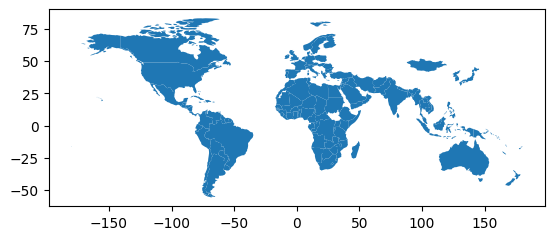

In [ ]:
#Test data with world plot
gdf.plot(legend_kwds={"label": "World Map", "orientation": "horizontal"})



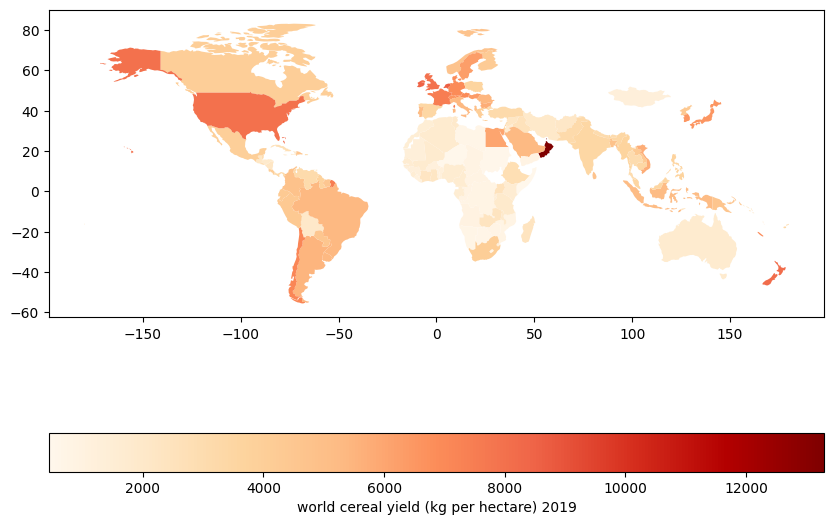

In [ ]:
#Chloropleth map of the world world cereal yield (kg per hectare) for the years 2019
gdf.plot(
    column="2019",
     cmap='OrRd',
    figsize=(10, 10),
    legend=True,
    legend_kwds={"label": "world cereal yield (kg per hectare) 2019", "orientation": "horizontal"},
);



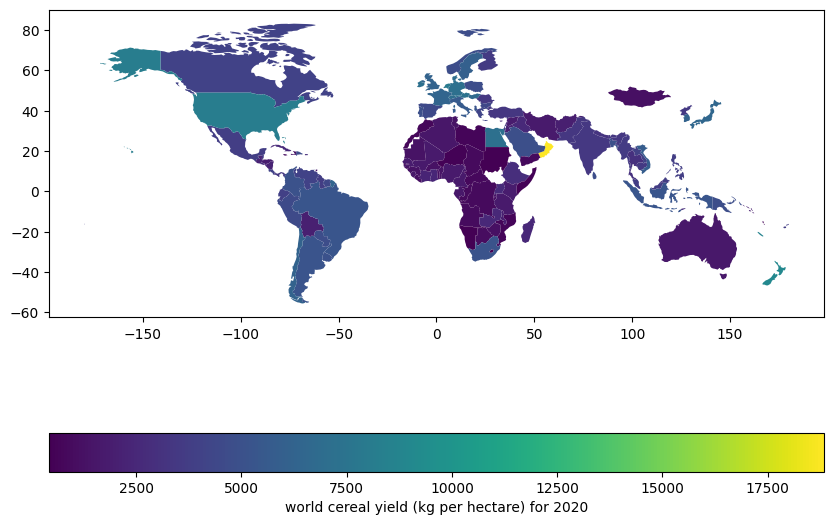

In [ ]:
#Chloropleth map of the world world cereal yield (kg per hectare) for the year 2020
gdf.plot(
    column="2020",
    figsize=(10, 10),
    legend=True,
    legend_kwds={"label": "world cereal yield (kg per hectare) for 2020", "orientation": "horizontal"},

);

## 1.2

In [ ]:
#loading the world population data
pop_df = pd.read_csv("/content/pop.csv", skiprows=4)
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [ ]:
#check null values in World population data
pop_df.drop(['Unnamed: 66'], axis=1, inplace=True)
pop_df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2017              2
2018              2
2019              2
2020              2
2021              2
Length: 66, dtype: int64

In [ ]:
#Merging The world data and population data and showing the first five rows
merged_data = pd.merge(df, pop_df, on=['Country Code', 'Country Name'], how='inner')
merged_data.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,...,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y
0,Africa Eastern and Southern,AFE,Cereal yield (kg per hectare),AG.YLD.CREL.KG,924.111737,931.506715,934.015106,879.750864,869.584522,879.866016,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
1,Afghanistan,AFG,Cereal yield (kg per hectare),AG.YLD.CREL.KG,1115.100000,1079.000000,985.800000,1082.800000,1098.900000,1012.300000,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
2,Africa Western and Central,AFW,Cereal yield (kg per hectare),AG.YLD.CREL.KG,675.354816,702.244456,698.032526,691.134187,658.343442,643.872508,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
3,Angola,AGO,Cereal yield (kg per hectare),AG.YLD.CREL.KG,828.000000,830.300000,798.400000,875.800000,932.000000,824.300000,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
4,Albania,ALB,Cereal yield (kg per hectare),AG.YLD.CREL.KG,845.200000,941.800000,982.300000,1023.300000,1037.300000,1318.600000,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0


In [ ]:
#Turning the merged data into a geopandas dataframe

new_gdf = gpd.GeoDataFrame(pop_df.merge(gdf, left_on="Country Code", right_on="iso_a3"), crs="EPSG:4326")

In [ ]:
new_gdf.head()

,Country Name_x,Country Code_x,Indicator Name_x,Indicator Code_x,1960,1961_x,1962_x,1963_x,1964_x,1965_x,...,2018_y,2019_y,2020_y,2021_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,2162.0,2113.4,1979.9,2154.7,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,941.4,958.8,992.5,1000.3,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,4840.5,5038.2,5209.2,5144.7,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,Argentina,ARG,"Population, total",SP.POP.TOTL,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,...,4671.4,5474.8,5213.1,5193.2,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
4,Australia,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,...,2035.8,1769.0,1650.7,2548.0,25364307.0,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


In [ ]:
#filter the dataset to get just the
filtered_data_1965 = gpd.GeoDataFrame(new_gdf[['Country Name_x', 'Country Code_x', 'Indicator Name_x', 'Indicator Code_x', '2021_x', '2021_y', 'geometry']])

# Display the result
filtered_data_1965.head()

,Country Name_x,Country Code_x,Indicator Name_x,Indicator Code_x,2021_x,2021_y,geometry
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,39835428.0,2154.7,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,"Population, total",SP.POP.TOTL,33933611.0,1000.3,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,"Population, total",SP.POP.TOTL,2811666.0,5144.7,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,Argentina,ARG,"Population, total",SP.POP.TOTL,45808747.0,5193.2,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
4,Australia,AUS,"Population, total",SP.POP.TOTL,25739256.0,2548.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


In [ ]:
filtered_2021 = new_gdf[new_gdf['2021_x'] <= 67326569]

filtered_2021.head()

,Country Name_x,Country Code_x,Indicator Name_x,Indicator Code_x,1960,1961_x,1962_x,1963_x,1964_x,1965_x,...,2018_y,2019_y,2020_y,2021_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,2162.0,2113.4,1979.9,2154.7,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,941.4,958.8,992.5,1000.3,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,4840.5,5038.2,5209.2,5144.7,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,Argentina,ARG,"Population, total",SP.POP.TOTL,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,...,4671.4,5474.8,5213.1,5193.2,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
4,Australia,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,...,2035.8,1769.0,1650.7,2548.0,25364307.0,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


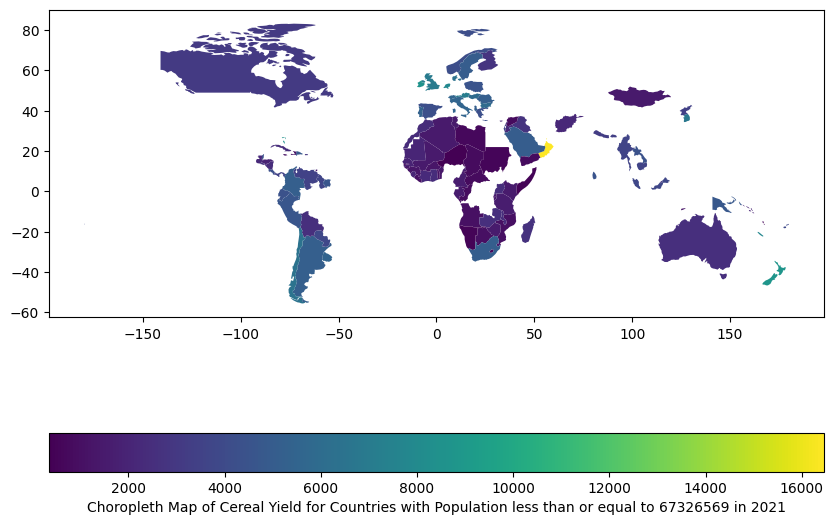

In [ ]:
filtered_2021.plot(
    column="2021_y",
    figsize=(10, 10),
    legend=True,
    legend_kwds={"label": "Choropleth Map of Cereal Yield for Countries with Population less than or equal to 67326569 in 2021", "orientation": "horizontal"},

);

1.2.2

In [ ]:
greaterthan_331893745 = new_gdf[new_gdf['2021_x'] >= 331893745]

greaterthan_331893745.head()

,Country Name_x,Country Code_x,Indicator Name_x,Indicator Code_x,1960,1961_x,1962_x,1963_x,1964_x,1965_x,...,2018_y,2019_y,2020_y,2021_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
54,India,IND,"Population, total",SP.POP.TOTL,450547675.0,459642166.0,469077191.0,478825602.0,488848139.0,499123328.0,...,3278.1,3416.1,3407.0,3478.8,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
125,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,8196.4,8006.1,8145.3,8268.0,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


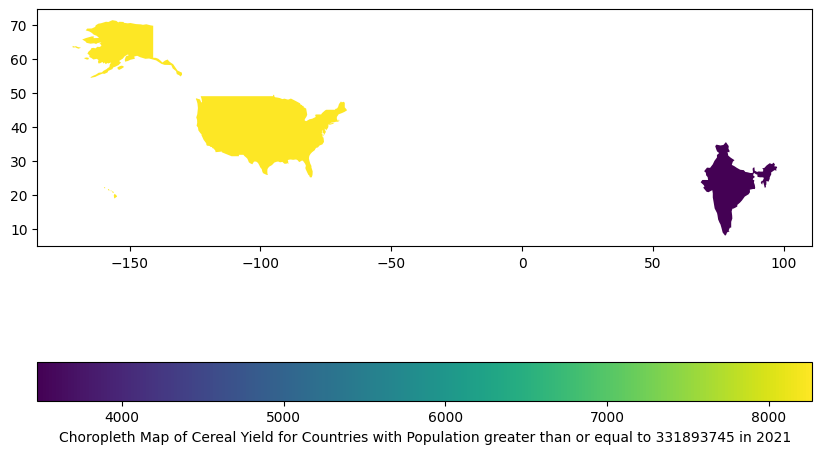

In [ ]:
greaterthan_331893745.plot(
    column="2021_y",
    figsize=(10, 10),
    legend=True,
    legend_kwds={"label": "Choropleth Map of Cereal Yield for Countries with Population greater than or equal to 331893745 in 2021", "orientation": "horizontal"},

);

# 1.2.3

choropleth maps of cereal yield for only the countries having a population between 10269022 and 1393409034

In [ ]:
greaterthan_331893745 = new_gdf[new_gdf['2021_x'] >= 331893745]
greaterthan =  new_gdf[(new_gdf['2021_x'] >= 10269022) & (new_gdf['2021_x'] <= 1393409034)]
greaterthan.head()

,Country Name_x,Country Code_x,Indicator Name_x,Indicator Code_x,1960,1961_x,1962_x,1963_x,1964_x,1965_x,...,2018_y,2019_y,2020_y,2021_y,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,2162.0,2113.4,1979.9,2154.7,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,941.4,958.8,992.5,1000.3,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
3,Argentina,ARG,"Population, total",SP.POP.TOTL,20481781.0,20817270.0,21153042.0,21488916.0,21824427.0,22159644.0,...,4671.4,5474.8,5213.1,5193.2,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
4,Australia,AUS,"Population, total",SP.POP.TOTL,10276477.0,10483000.0,10742000.0,10950000.0,11167000.0,11388000.0,...,2035.8,1769.0,1650.7,2548.0,25364307.0,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."
6,Burundi,BDI,"Population, total",SP.POP.TOTL,2797925.0,2852438.0,2907320.0,2964416.0,3026292.0,3094378.0,...,1322.8,1445.7,1261.7,1481.5,11530580.0,Africa,Burundi,BDI,3012,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762..."


<Axes: >

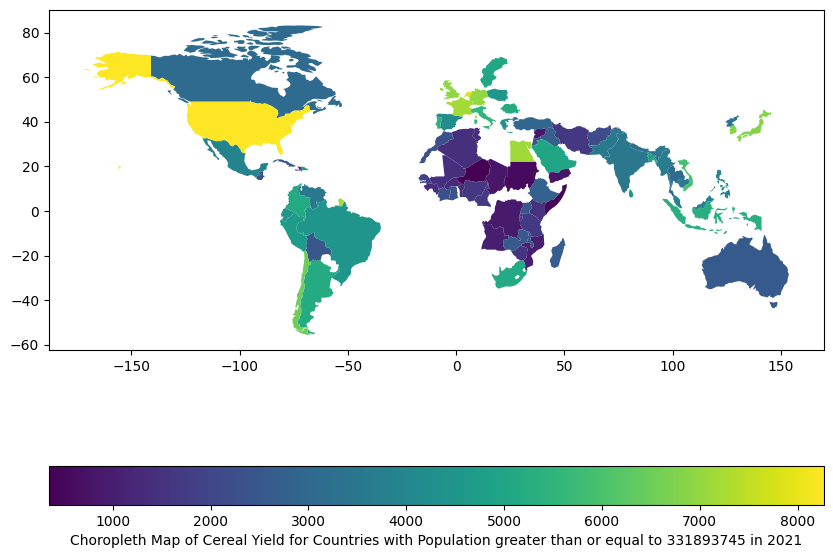

In [ ]:
greaterthan.plot(
    column="2021_y",
    figsize=(10, 10),
    legend=True,
    legend_kwds={"label": "Choropleth Map of Cereal Yield for Countries with Population greater than or equal to 331893745 in 2021", "orientation": "horizontal"},

)

# Task 1.2.4

Plot (scatter or line plot) the percentage change in cereal yield from 2011 to 2021, for the country having the highest population in 2021. In this question, you must consider the cereal yield for each year between 2011 and 2021.

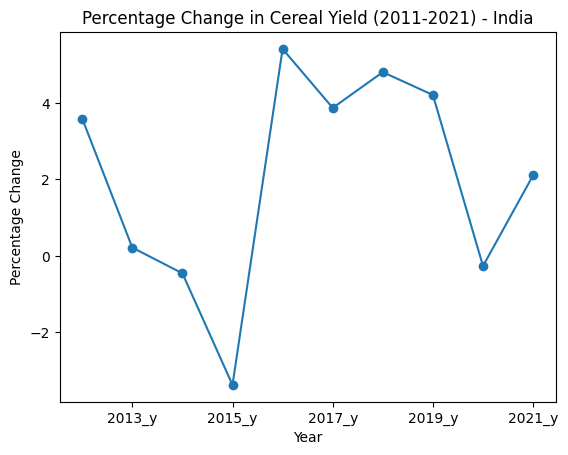

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'merged_data'
# Make sure the column names match your actual data

# Step 1: Identify the country with the highest population in 2021
highest_population_country = new_gdf.loc[new_gdf['2021_x'].idxmax()]

# Step 2: Extract cereal yield data for the highest population country from 2011 to 2021
cereal_yield_data = highest_population_country.loc['2011_y':'2021_y']

# Step 3: Calculate the percentage change in cereal yield
percentage_change = cereal_yield_data.pct_change() * 100

# Step 4: Plot the percentage change
fig, ax = plt.subplots()
percentage_change.plot(kind='line', marker='o', ax=ax)
ax.set_title(f"Percentage Change in Cereal Yield (2011-2021) - {highest_population_country['Country Name_x']}")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage Change")
plt.show()

#1.2.5
Present a scatter plot between the mean population of each country and the mean cereal yield from the year 2011 until 2021. Very briefly interpret the generated plot, particularly looking for any correlation (if present) among the plotted variables. In this question, you must consider each year between 2011 and 2021 to find the mean population and mean cereal yield.

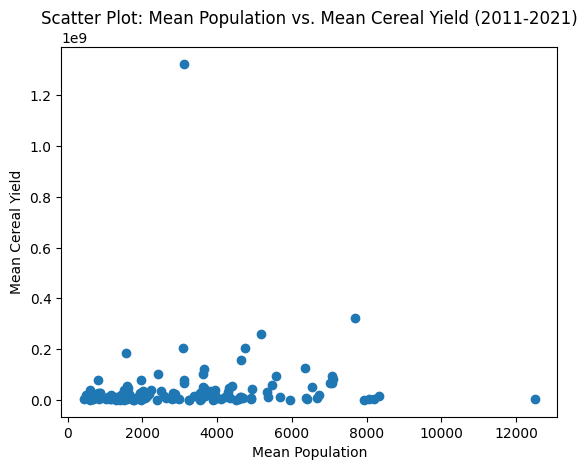

In [ ]:
#years with _y are for the population data while the ones
population_columns = ['2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y', '2017_y', '2018_y', '2019_y', '2020_y', '2021_y']
cereal_yield_columns = ['2011_x', '2012_x', '2013_x', '2014_x', '2015_x', '2016_x', '2017_x', '2018_x', '2019_x', '2020_x', '2021_x']

# Step 2: Calculate mean population and mean cereal yield
new_gdf['mean_population'] = new_gdf[population_columns].mean(axis=1)
new_gdf['mean_cereal_yield'] = new_gdf[cereal_yield_columns].mean(axis=1)

# Step 3: Create a scatter plot
plt.scatter(new_gdf['mean_population'], new_gdf['mean_cereal_yield'])
plt.title('Scatter Plot: Mean Population vs. Mean Cereal Yield (2011-2021)')
plt.xlabel('Mean Population')
plt.ylabel('Mean Cereal Yield')
plt.show()